In [231]:
#packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#csv file is uploaded to google colab, when running the program you must use google colab to upload the csv file for program to work
from google.colab import files
import io


uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['ttc-bus-delay-data-2022.csv']))
df.head()



Saving ttc-bus-delay-data-2022.csv to ttc-bus-delay-data-2022 (9).csv


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0


In [232]:
#cleaning/preping data
#empty data entries

df.isnull().sum()

Date            0
Route         344
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    8831
Vehicle         0
dtype: int64

In [233]:
#fill in empty entries
df.fillna('0',inplace=True)

In [234]:
df.isnull().sum()

Date         0
Route        0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
Direction    0
Vehicle      0
dtype: int64

In [235]:
#Date converted to timestamp
df['Date'] =df['Date'].apply(pd.to_datetime)

In [236]:
#column names
for col in df.columns:
    print(col)

Date
Route
Time
Day
Location
Incident
Min Delay
Min Gap
Direction
Vehicle


In [237]:
#statistics nuemric and object columns
numeric_col = df.select_dtypes('number')
print(numeric_col.describe())

object_col = df.select_dtypes('object')
print(object_col.describe())

          Min Delay       Min Gap       Vehicle
count  49490.000000  49490.000000  49490.000000
mean      19.881269     32.460901   5472.335987
std       47.769025     49.360984   4456.326800
min        0.000000      0.000000      0.000000
25%        9.000000     17.000000   1423.000000
50%       11.000000     22.000000   7965.000000
75%       20.000000     36.000000   8551.000000
max      999.000000    999.000000  93561.000000
        Route   Time     Day         Location               Incident Direction
count   49490  49490   49490            49490                  49490     49490
unique    243   1440       7             8839                     15        18
top        36  16:00  Friday  KENNEDY STATION  Operations - Operator         N
freq     1612    165    8340             1161                  17372     11104


In [238]:
#total amount of delay indicdents/rows n-1
len(df)-1

49489

In [239]:
#list of incidents and type and count
Incidenttype = df.groupby(df['Incident'])['Incident'].count()
Incidenttype

Incident
Cleaning - Disinfection                 6
Cleaning - Unsanitary                1241
Collision - TTC                      2908
Diversion                            2294
Emergency Services                   1966
General Delay                        2464
Held By                               147
Investigation                         769
Late Entering Service                  40
Mechanical                          13674
Operations - Operator               17372
Road Blocked - NON-TTC Collision      547
Security                             2732
Utilized Off Route                   2699
Vision                                631
Name: Incident, dtype: int64

In [240]:
#list of routes and station origin of delay indicent
print(df['Route'].unique())
print(df['Location'].unique())

['320' '325' '363' '96' '300' '47' '45' '32' '39' '53' '29' '334' '25' '7'
 '36' '162' '35' '74' '52' '14' '95' '79' '85' '20' '41' '46' '960' '42'
 '116' '43' '129' '54' '89' '11' '102' '70' '124' '24' '88' '935' '127'
 '37' '60' '17' '34' '72' '91' '75' '86' '19' '97' '40' '78' '62' '189'
 '121' '100' '94' '134' '22' '84' '165' '501' '131' '900' '123' '38' '76'
 '110' '112' '66' '108' '69' '61' '87' '73' '68' '63' '26' '71' '504'
 '161' '57' '21' '105' '130' '118' '67' '44' '90' '106' '56' '999' '307'
 '168' '15' '937' '171' '952' '989' '119' '902' '953' '925' '944' '941'
 '125' '50' '984' '939' '16' '996' '0' '13' '80' '81' '927' '905' '133'
 '160' '107' '109' '111' '98' '122' '924' '48' '995' '600' '23' '51' '99'
 '65' '985' '135' '126' '986' '506' '929' '77' '353' '352' '354' '945'
 '120' '31' '104' '169' '324' '954' '30' '59' '113' '12' '49' '336' '167'
 '82' '512' '33' '64' '332' '339' '101' '83' '396' '343' '384' '115' '92'
 '8' '335' '545' '9505' '152' '337' '55' '10' '9' '28'

In [241]:
#delay time statistics
#total time hours lost to delays
inct = df.groupby(df['Incident'])['Min Delay'].sum()/60 
inct

Incident
Cleaning - Disinfection                8.933333
Cleaning - Unsanitary                302.233333
Collision - TTC                      580.933333
Diversion                           4817.333333
Emergency Services                   397.666667
General Delay                       1009.166667
Held By                              203.250000
Investigation                        149.733333
Late Entering Service                 13.033333
Mechanical                          2984.300000
Operations - Operator               3923.350000
Road Blocked - NON-TTC Collision     693.133333
Security                             616.350000
Utilized Off Route                   559.083333
Vision                               140.233333
Name: Min Delay, dtype: float64

In [242]:
#Total time lost due to delays (hours)
ts=df['Min Delay'].sum()/60  
ts

16398.733333333334

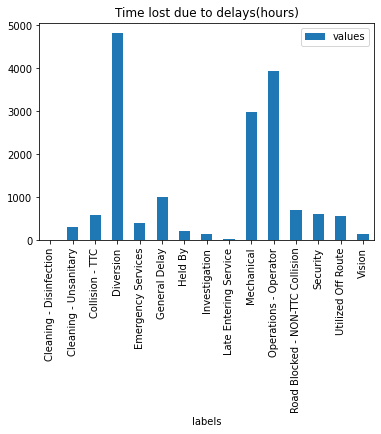

In [243]:
#total time hours lost to delays bar graph
dfinc = pd.DataFrame({'labels': inct.index,
                   'values': inct.values
                  })
dfinc.plot(kind='bar',x = 'labels', y = 'values', title="Time lost due to delays(hours)") 

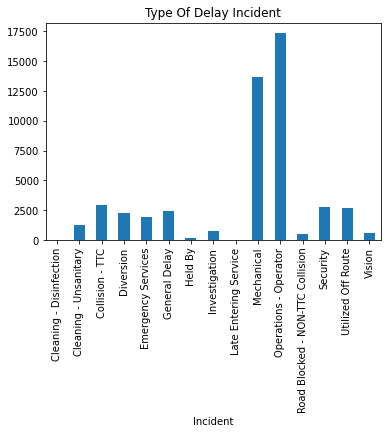

In [244]:
#bar graph of indicents
df.groupby('Incident')['Incident'].count().plot(kind='bar', title= "Type Of Delay Incident")



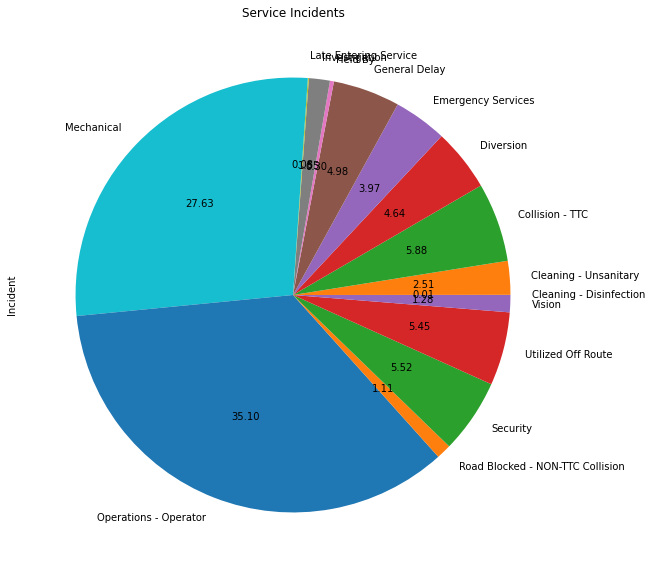

In [245]:
#pie percent of total service indients
df.groupby('Incident')['Incident'].count().plot.pie(title="Service Incidents", autopct='%.2f',figsize=(10,10))


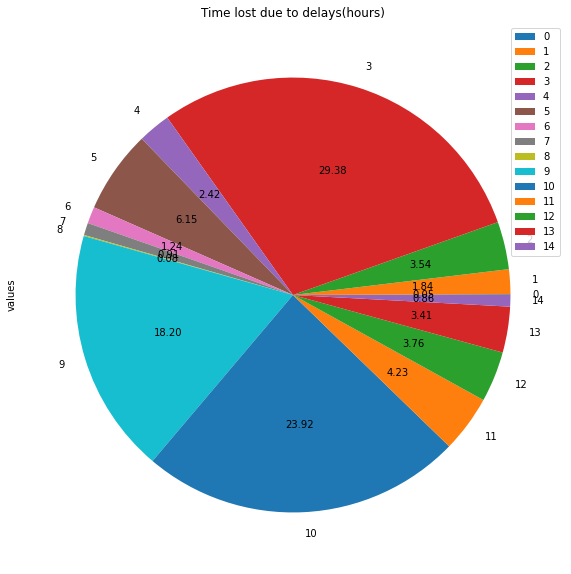

In [246]:
#pie percent of time lost due to service indients
dfinc = pd.DataFrame({'labels': inct.unique(),
                   'values': inct.values
                  })
dfinc.plot.pie(y = 'values', title="Time lost due to delays(hours)",autopct='%.2f',figsize=(10,10)) 

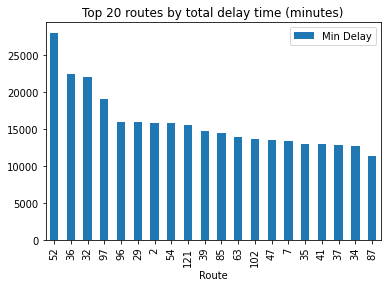

In [247]:
#Top 20 routes by total delay time (minutes)
route = df.groupby(df['Route'])['Min Delay'].sum().reset_index()
route = route.sort_values(by = ['Min Delay'], ascending = False).head(20)
route.plot(kind='bar',x = 'Route', y = 'Min Delay', title="Top 20 routes by total delay time (minutes)")

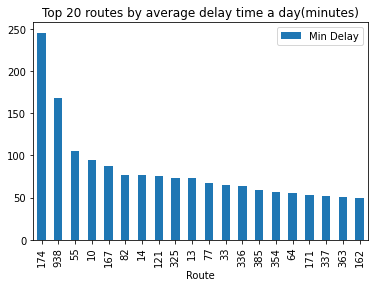

In [248]:
# add these 

#Top 20 routes by average delay time a day (minutes)
route = df.groupby(df['Route'])['Min Delay'].mean().reset_index()
route = route.sort_values(by = ['Min Delay'], ascending = False).head(20)
route.plot(kind='bar',x = 'Route', y = 'Min Delay', title="Top 20 routes by average delay time a day(minutes)",)

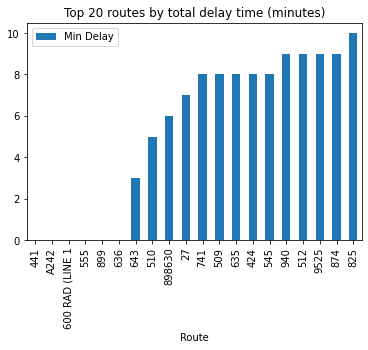

In [249]:
#Top 20 least delayed routes a day (minutes)
route = df.groupby(df['Route'])['Min Delay'].sum().reset_index()
route = route.sort_values(by = ['Min Delay'], ascending = True).head(20)
route.plot(kind='bar',x = 'Route', y = 'Min Delay', title="Top 20 routes by total delay time (minutes)")

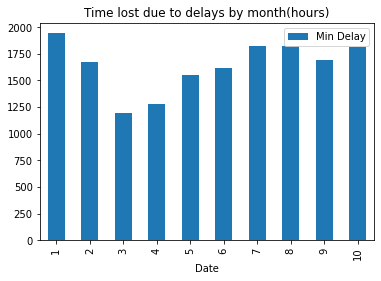

In [250]:
#time lost to delays by month
df['Date'] =df['Date'].apply(pd.to_datetime)
df_month = df.groupby(df['Date'].dt.month)['Min Delay'].sum()/60  
df_month = df_month.reset_index()
df_month.plot(kind = 'bar', x= 'Date', y = 'Min Delay', title = 'Time lost due to delays by month(hours)')

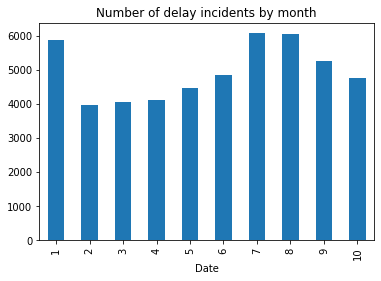

In [251]:
#Total delays by month

df_monthi = df.groupby(df['Date'].dt.month)['Incident'].count() 

df_monthi.plot(kind = 'bar', x= 'Date', y = 'Incident', title = 'Number of delay incidents by month')

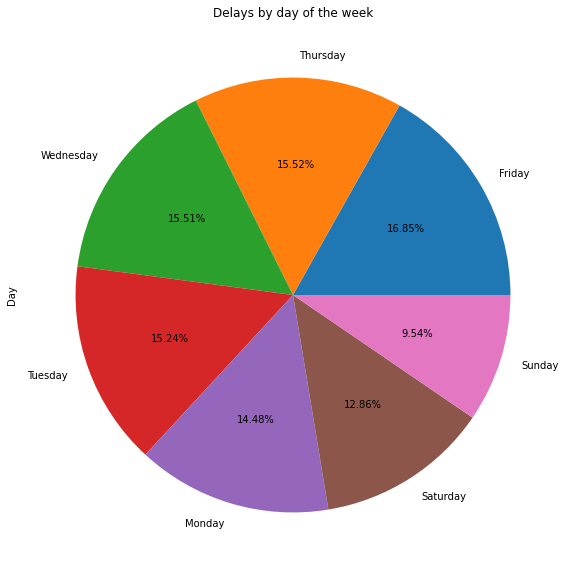

In [252]:
#delays by day
plt.figure(figsize=(10, 10))
df['Day'].value_counts().plot.pie(autopct='%.2f%%', title = 'Delays by day of the week')

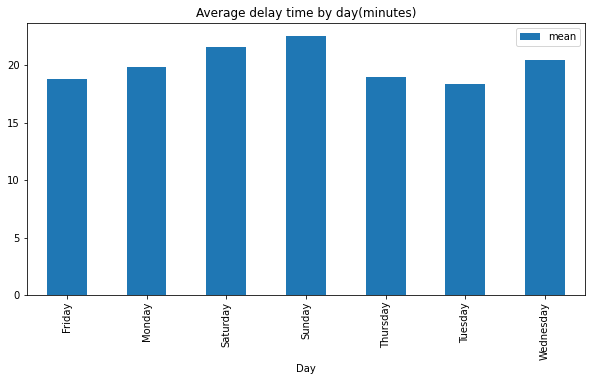

In [253]:
#average delay time by day(minutes)

df.groupby(df['Day'])['Min Delay'].agg(['mean']).plot.bar(figsize=(10, 5),title="Average delay time by day(minutes)")

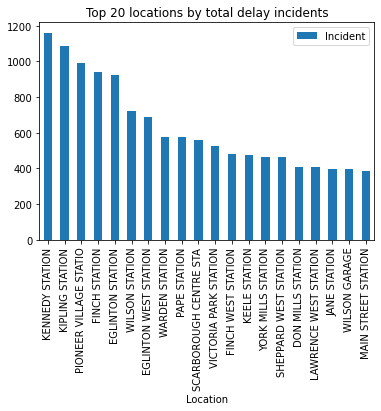

In [254]:
#Top 20 locations by total delay incidents
locs = df.groupby(df['Location'])['Incident'].count().reset_index()
locs = locs.sort_values(by = ['Incident'], ascending = False).head(20)
locs.plot(kind='bar',x = 'Location', y = 'Incident', title="Top 20 locations by total delay incidents")




In [259]:
#predictive leanring y=time delay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#label Encoder.
le = LabelEncoder()
 

label = le.fit_transform(df['Incident'])
df.drop('Incident', axis=1, inplace=True)
df['Incident'] = label


label = le.fit_transform(df['Location']) 
df.drop('Location', axis=1, inplace=True)
df['Location'] = label


label = le.fit_transform(df['Route']) 
df.drop('Route', axis=1, inplace=True)
df['Route'] = label



df.info()
y = df['Min Delay']
x = df.drop(['Min Delay', 'Date', 'Direction','Time','Day'], axis=1)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#decesion tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(classification_report(y_test, y_pred))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49490 entries, 0 to 49489
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       49490 non-null  datetime64[ns]
 1   Time       49490 non-null  object        
 2   Day        49490 non-null  object        
 3   Min Delay  49490 non-null  int64         
 4   Min Gap    49490 non-null  int64         
 5   Direction  49490 non-null  object        
 6   Vehicle    49490 non-null  int64         
 7   Incident   49490 non-null  int64         
 8   Location   49490 non-null  int64         
 9   Route      49490 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 3.8+ MB
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       442
           1       0.58      0.73      0.65        15
           2       0.50      0.44      0.47         9
           3       0.60      0.53      0.